In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df  = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis (EDA):

In [4]:
df.shape

(7043, 21)

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#checking column
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
#checking for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### NO null values present in dataset

# Summary Statistics:

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Analyzing Target variable:

In [10]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

#### Dataset contains categorical values

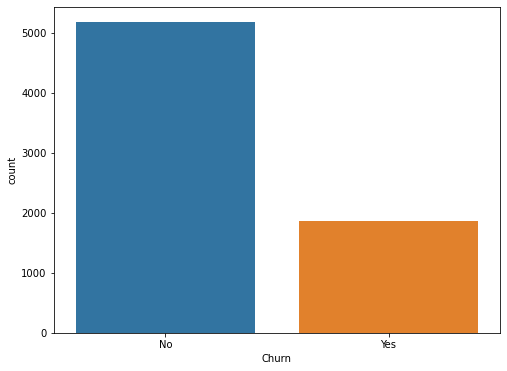

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(df['Churn'])
plt.show()

# Analyzing Independent Variable:

In [13]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [14]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

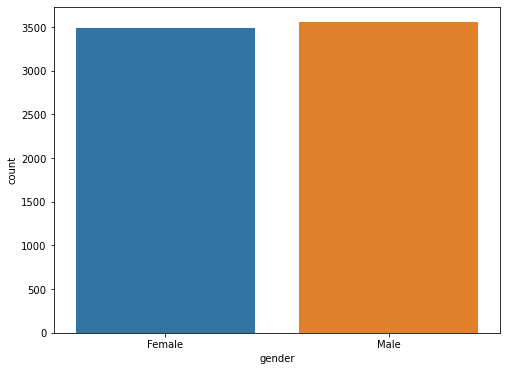

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(df['gender'])
plt.show()

#### Noramlly Distributed

In [16]:
df['customerID'].unique()

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

In [17]:
df['customerID'].value_counts()

2519-TWKFS    1
2081-VEYEH    1
9742-XOKTS    1
6094-ZIVKX    1
1697-LYYYX    1
             ..
1839-FBNFR    1
6313-GIDIT    1
7148-XZPHA    1
6075-SLNIL    1
1448-CYWKC    1
Name: customerID, Length: 7043, dtype: int64

<AxesSubplot:xlabel='customerID', ylabel='count'>

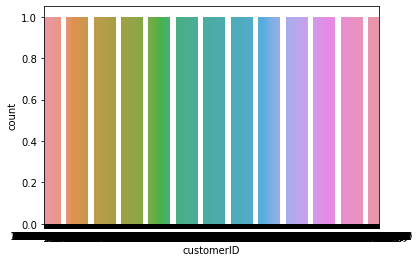

In [18]:
sns.countplot(df['customerID'])

#### Noramlly Distributed

In [19]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [20]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

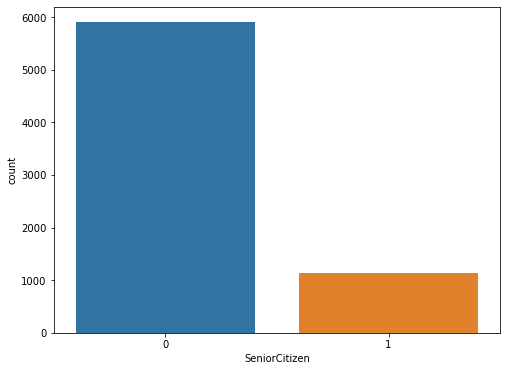

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(df['SeniorCitizen'])
plt.show()

#### Data is not normally distributed

In [22]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [23]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

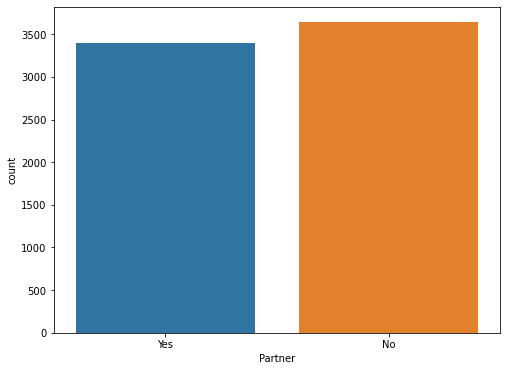

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(df['Partner'])
plt.show()

In [25]:
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

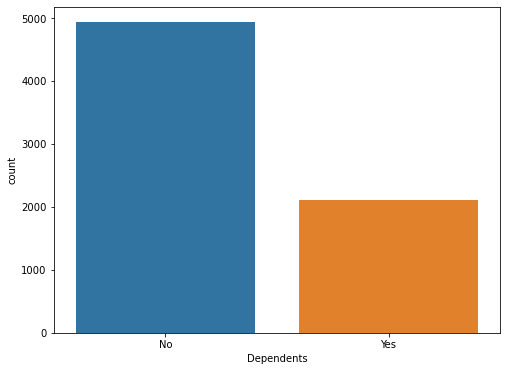

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(df['Dependents'])
plt.show()

In [28]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [29]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

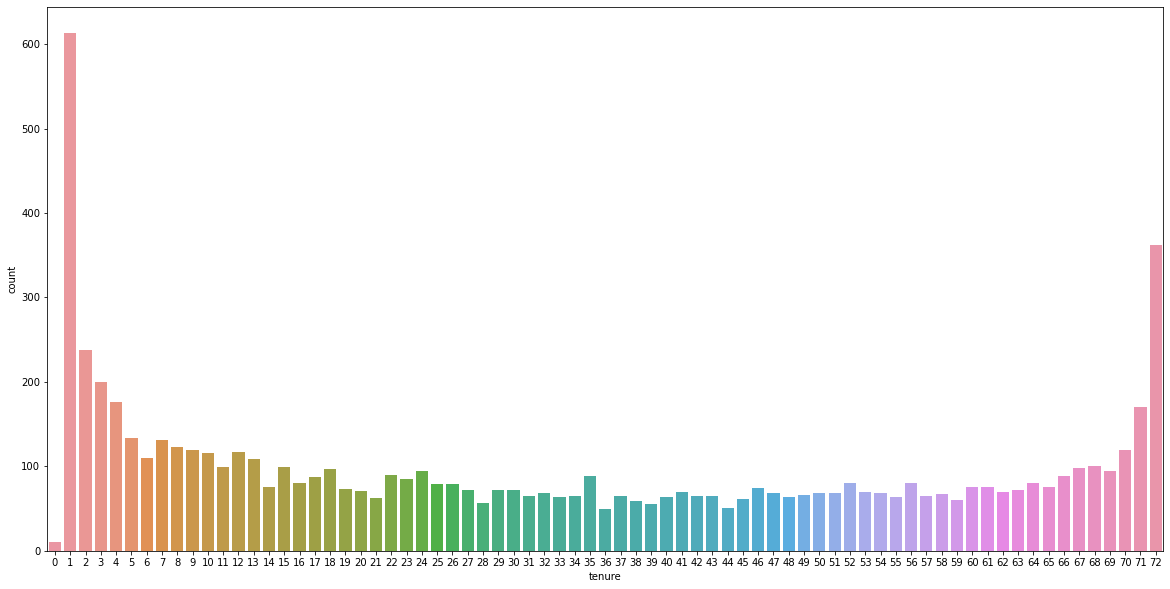

In [30]:
plt.figure(figsize=(20,10))
sns.countplot(df['tenure'])
plt.show()

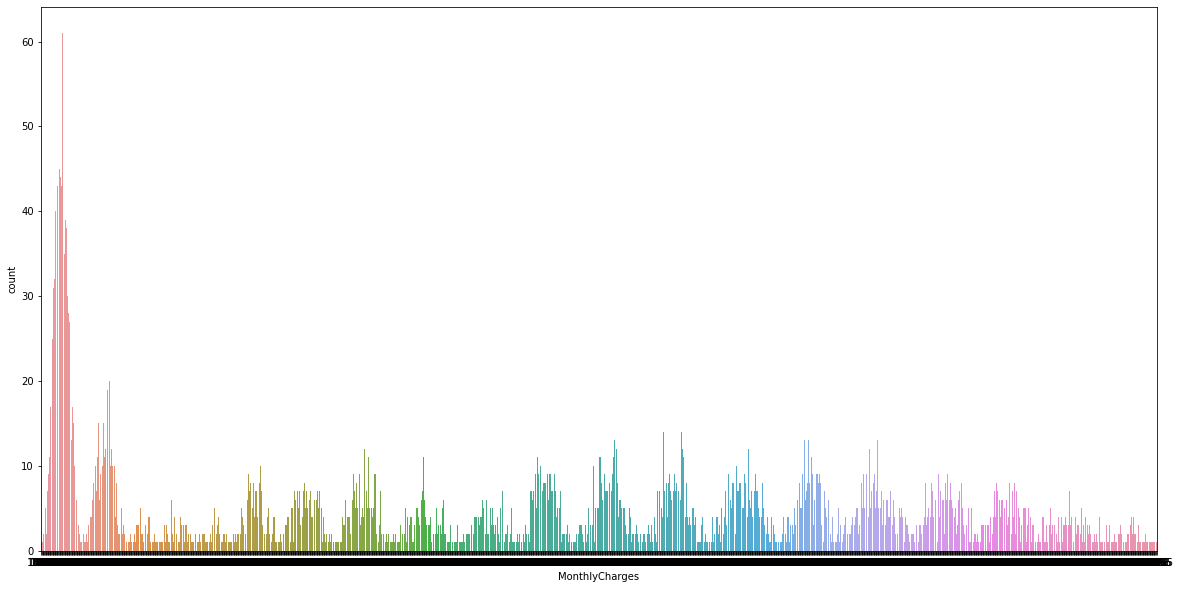

In [31]:
plt.figure(figsize=(20,10))
sns.countplot(df['MonthlyCharges'])
plt.show()

#### Data Preprocessing:

In [32]:
df = df.drop('customerID',axis=1)

### Label Encoding:

In [33]:
#importing Label Encoder 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
df['Partner'] = le.fit_transform(df['Partner'])

In [35]:
df['PhoneService'] = le.fit_transform(df['PhoneService'])

In [36]:
df['MultipleLines'] = le.fit_transform(df['MultipleLines'])

In [37]:
df['InternetService'] = le.fit_transform(df['InternetService'])

In [38]:
df['Dependents'] = le.fit_transform(df['Dependents'])

In [89]:
df['gender'] = le.fit_transform(df['gender'])

In [90]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,1274,6104,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,1075,1550,0


In [40]:
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'])
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])
df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'])
df['TechSupport'] = le.fit_transform(df['TechSupport'])
df['StreamingTV'] = le.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'])
df['Contract'] = le.fit_transform(df['Contract'])
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])
df['MonthlyCharges'] = le.fit_transform(df['MonthlyCharges'])
df['TotalCharges'] = le.fit_transform(df['TotalCharges'])
df['Churn'] = le.fit_transform(df['Churn'])

In [91]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,1274,6104,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,1075,1550,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0,0,0,72,1,0,2,1,1,1,1,1,1,2,1,0,52,770,0
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,991,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,1340,5698,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,795,2660,1


# Correlation:

In [92]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.006666,-0.003095,0.015081,0.000705,NaN,-0.007232,0.001883,-0.016543,-0.009229,-0.003004,-0.009510,-0.005602,-0.002749,-0.000091,-0.018561,0.023108,-0.013391,-0.003133,-0.011212
SeniorCitizen,-0.006666,1.000000,0.014985,-0.212450,0.018998,NaN,0.153645,-0.040567,-0.123628,-0.020639,-0.023526,-0.144616,0.028561,0.047145,-0.139921,0.155571,-0.043247,0.239122,0.039568,0.148802
Partner,-0.003095,0.014985,1.000000,0.454535,0.385531,NaN,0.150238,-0.006811,0.151603,0.155452,0.168046,0.132586,0.134436,0.128787,0.299346,-0.009456,-0.150912,0.103778,0.061375,-0.154692
Dependents,0.015081,-0.212450,0.454535,1.000000,0.161524,NaN,-0.026347,0.051687,0.146629,0.090982,0.083529,0.130405,0.049732,0.024854,0.243697,-0.106037,-0.039747,-0.121830,-0.007108,-0.159481
tenure,0.000705,0.018998,0.385531,0.161524,1.000000,NaN,0.360691,-0.038332,0.326014,0.377266,0.367755,0.324150,0.283530,0.293767,0.675544,0.003627,-0.364802,0.272833,0.185291,-0.349681
PhoneService,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,-0.007232,0.153645,0.150238,-0.026347,0.360691,NaN,1.000000,-0.109861,0.007312,0.125802,0.130775,0.011859,0.188227,0.194299,0.116643,0.174347,-0.186049,0.470153,0.122261,0.040207
InternetService,0.001883,-0.040567,-0.006811,0.051687,-0.038332,NaN,-0.109861,1.000000,-0.026160,0.031031,0.050406,-0.021632,0.099601,0.094262,0.112766,-0.165694,0.100110,-0.396485,-0.099966,-0.059137
OnlineSecurity,-0.016543,-0.123628,0.151603,0.146629,0.326014,NaN,0.007312,-0.026160,1.000000,0.199192,0.174330,0.284134,0.047993,0.063601,0.367511,-0.155053,-0.089331,-0.058487,0.059649,-0.290086
OnlineBackup,-0.009229,-0.020639,0.155452,0.090982,0.377266,NaN,0.125802,0.031031,0.199192,1.000000,0.196737,0.211105,0.152935,0.140898,0.286501,-0.020016,-0.126560,0.136505,0.106221,-0.202671


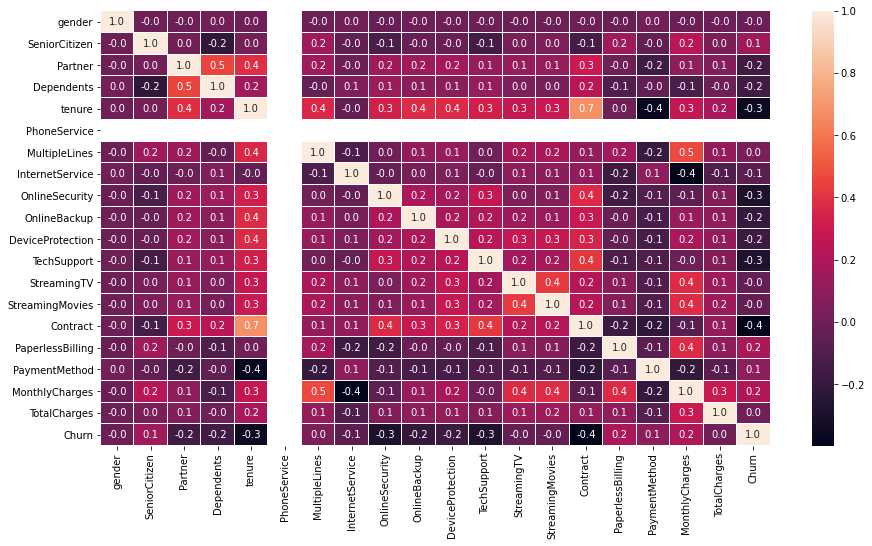

In [93]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),linewidths=0.1,fmt='0.1f',annot=True)
plt.show()

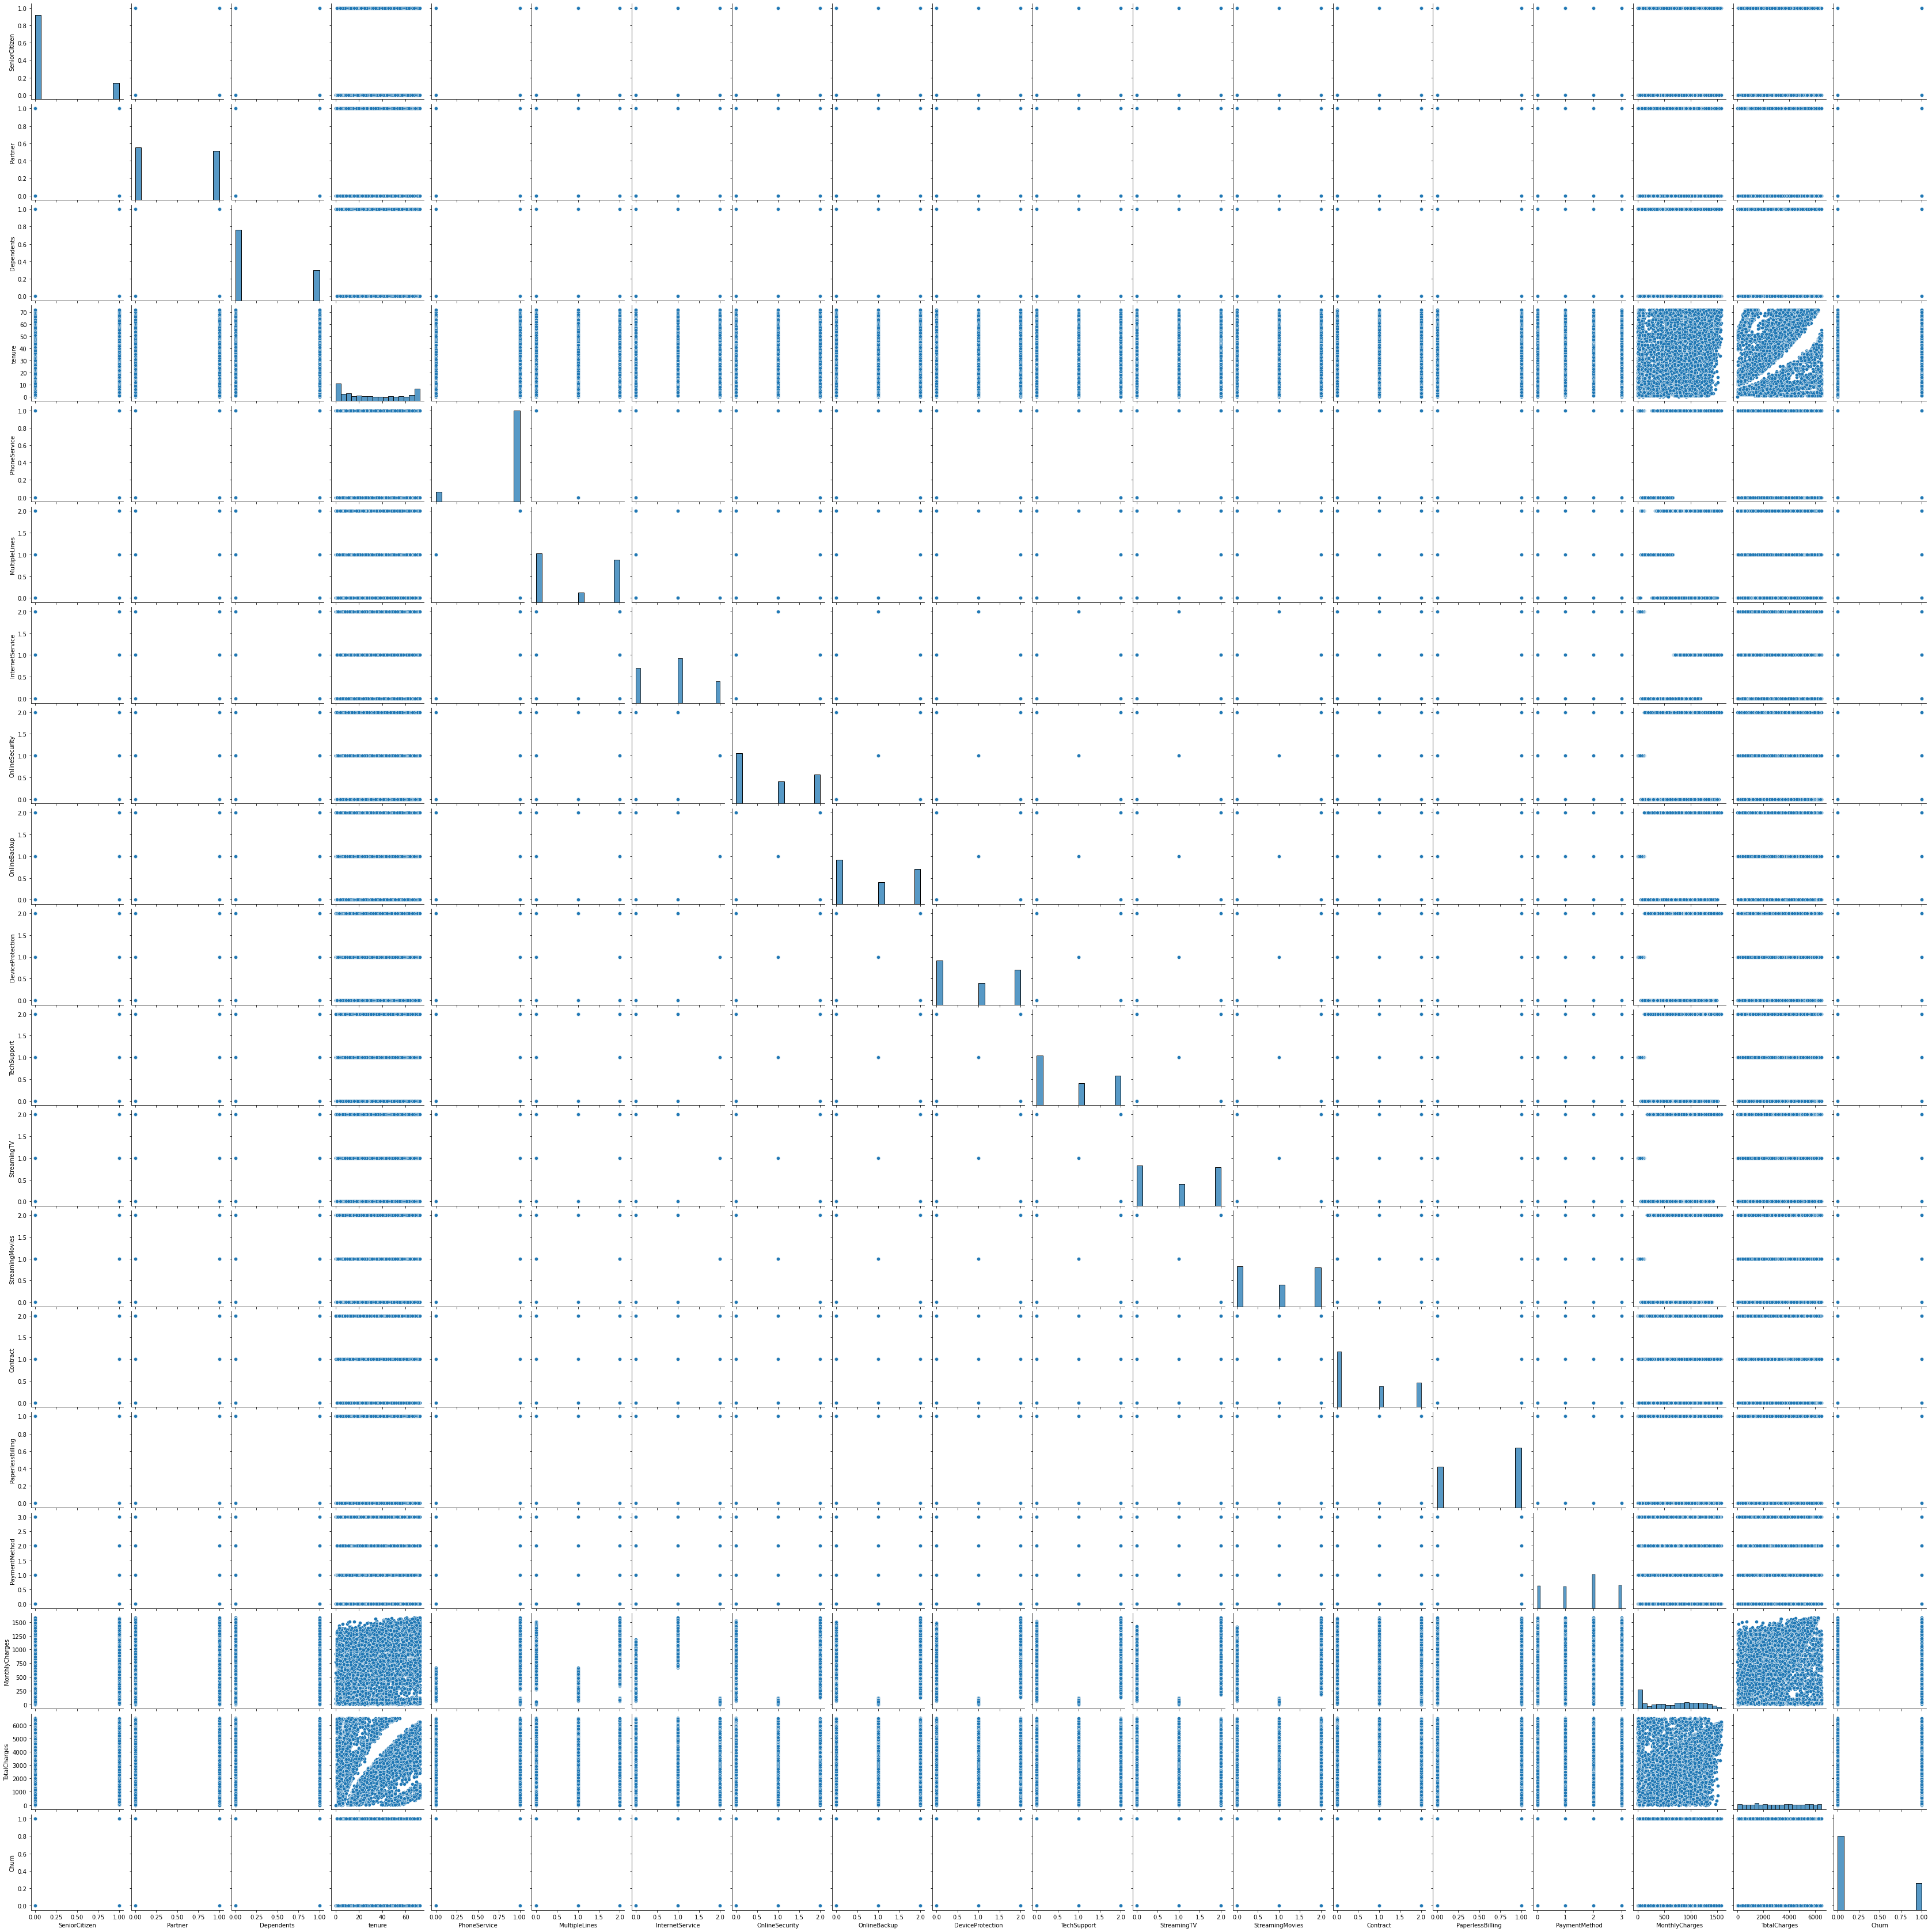

In [44]:
#plotting pairplt
sns.pairplot(df)

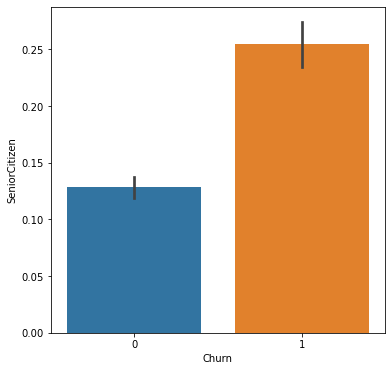

In [45]:
plt.figure(figsize=(6,6))
sns.barplot(x="Churn", y="SeniorCitizen", data=df)
plt.show()

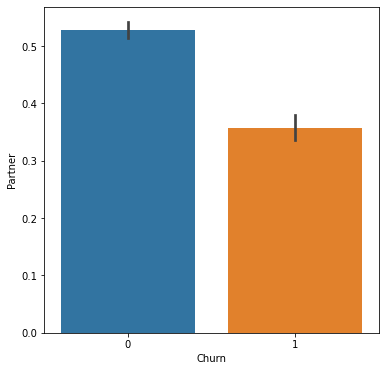

In [46]:
plt.figure(figsize=(6,6))
sns.barplot(x="Churn", y="Partner", data=df)
plt.show()

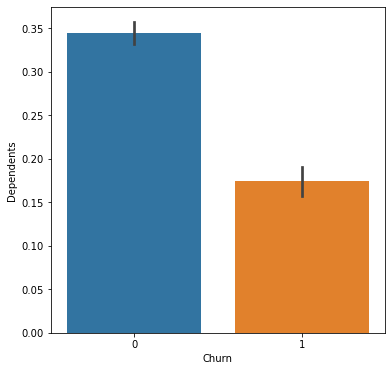

In [47]:
plt.figure(figsize=(6,6))
sns.barplot(x="Churn", y="Dependents", data=df)
plt.show()

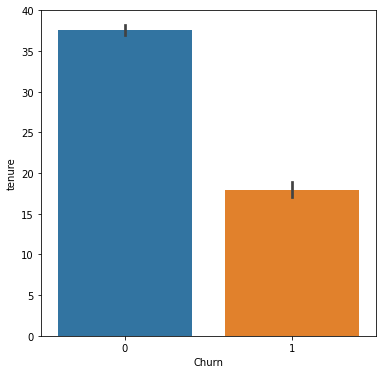

In [48]:
plt.figure(figsize=(6,6))
sns.barplot(x="Churn", y="tenure", data=df)
plt.show()

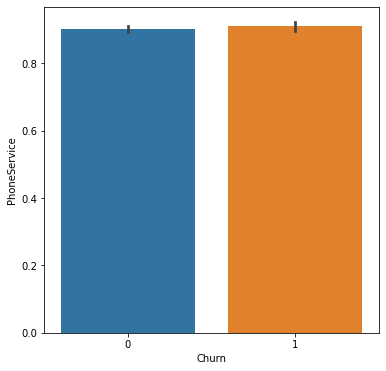

In [49]:
plt.figure(figsize=(6,6))
sns.barplot(x="Churn", y="PhoneService", data=df)
plt.show()

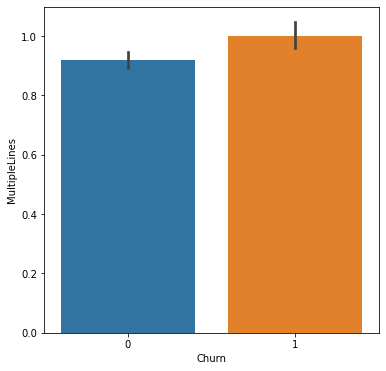

In [50]:
plt.figure(figsize=(6,6))
sns.barplot(x="Churn", y="MultipleLines", data=df)
plt.show()

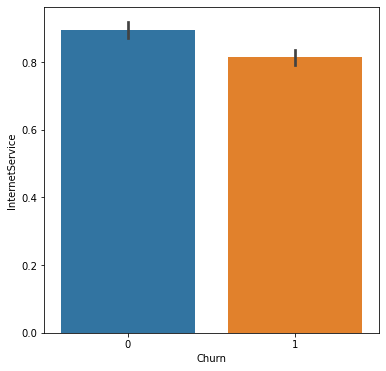

In [51]:
plt.figure(figsize=(6,6))
sns.barplot(x="Churn", y="InternetService", data=df)
plt.show()

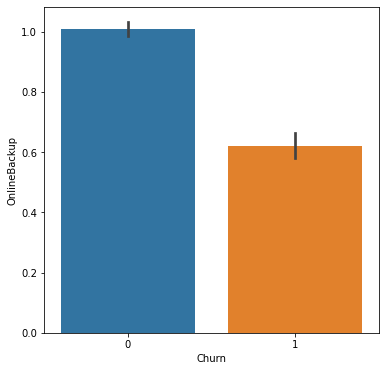

In [52]:
plt.figure(figsize=(6,6))
sns.barplot(x="Churn", y="OnlineBackup", data=df)
plt.show()

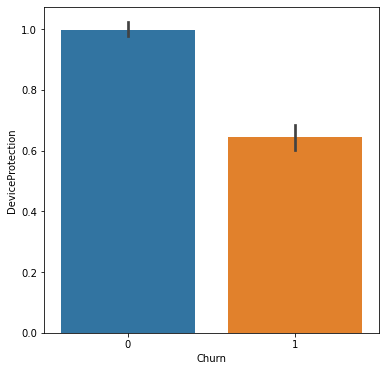

In [53]:
plt.figure(figsize=(6,6))
sns.barplot(x="Churn", y="DeviceProtection", data=df)
plt.show()

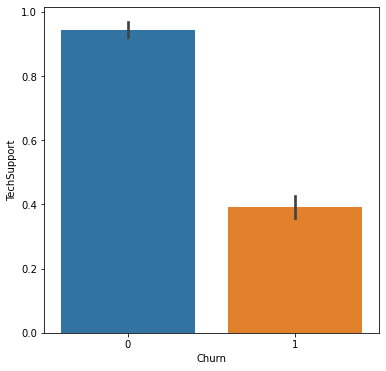

In [54]:
plt.figure(figsize=(6,6))
sns.barplot(x="Churn", y="TechSupport", data=df)
plt.show()

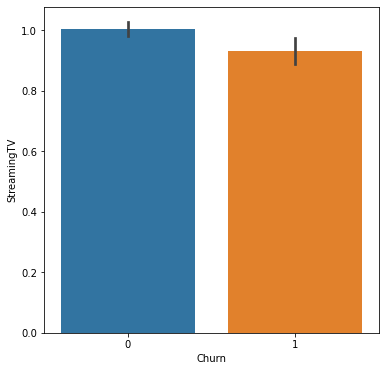

In [55]:
plt.figure(figsize=(6,6))
sns.barplot(x="Churn", y="StreamingTV", data=df)
plt.show()

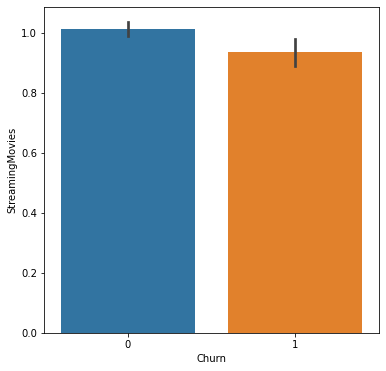

In [56]:
plt.figure(figsize=(6,6))
sns.barplot(x="Churn", y="StreamingMovies", data=df)
plt.show()

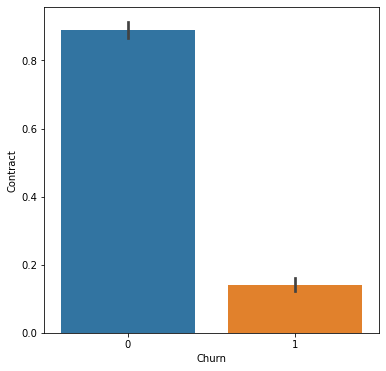

In [57]:
plt.figure(figsize=(6,6))
sns.barplot(x="Churn", y="Contract", data=df)
plt.show()

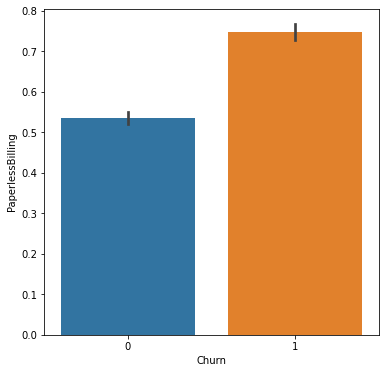

In [58]:
plt.figure(figsize=(6,6))
sns.barplot(x="Churn", y="PaperlessBilling", data=df)
plt.show()

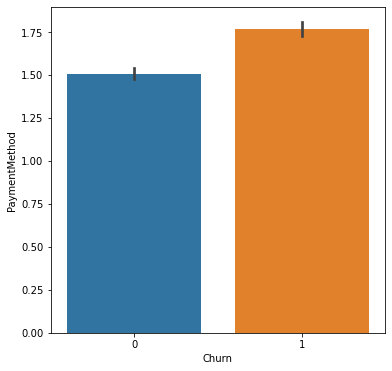

In [59]:
plt.figure(figsize=(6,6))
sns.barplot(x="Churn", y="PaymentMethod", data=df)
plt.show()

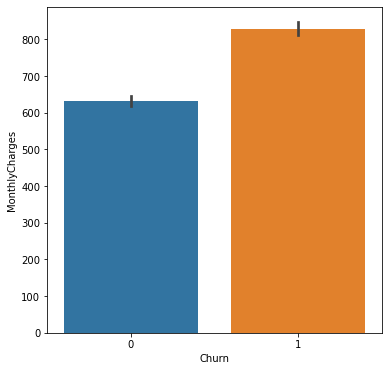

In [60]:
plt.figure(figsize=(6,6))
sns.barplot(x="Churn", y="MonthlyCharges", data=df)
plt.show()

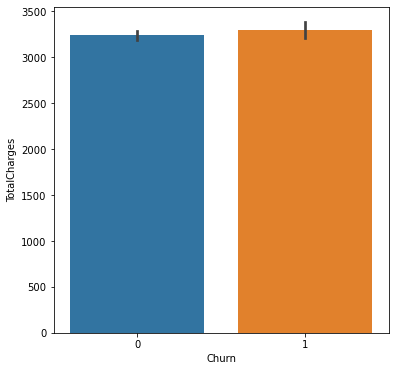

In [61]:
plt.figure(figsize=(6,6))
sns.barplot(x="Churn", y="TotalCharges", data=df)
plt.show()

# Checking For Outliers:

In [62]:
X = df.drop(columns = ['Churn'])
y = df['Churn']

In [94]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,1274,6104,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,1075,1550,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0,0,0,72,1,0,2,1,1,1,1,1,1,2,1,0,52,770,0
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,991,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,1340,5698,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,795,2660,1


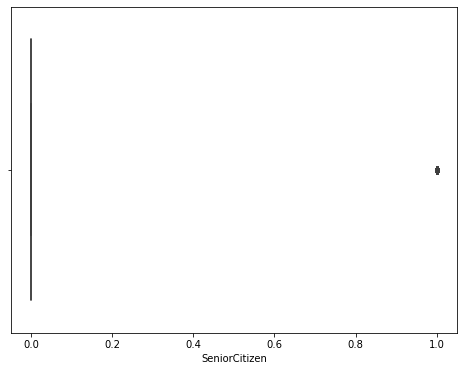

In [64]:
plt.figure(figsize=(8,6))
sns.boxplot(df['SeniorCitizen'])
plt.show()

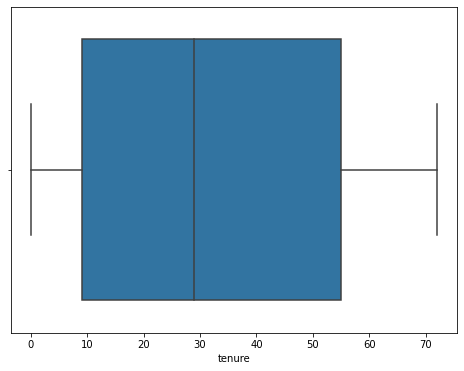

In [65]:
plt.figure(figsize=(8,6))
sns.boxplot(df['tenure'])
plt.show()

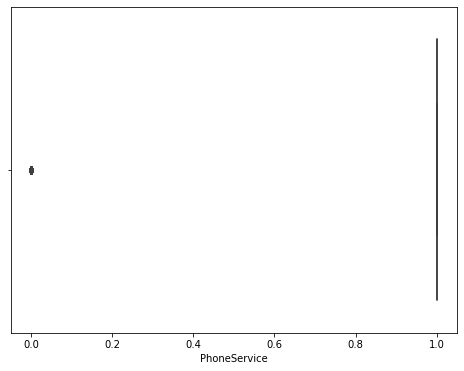

In [66]:
plt.figure(figsize=(8,6))
sns.boxplot(df['PhoneService'])
plt.show()

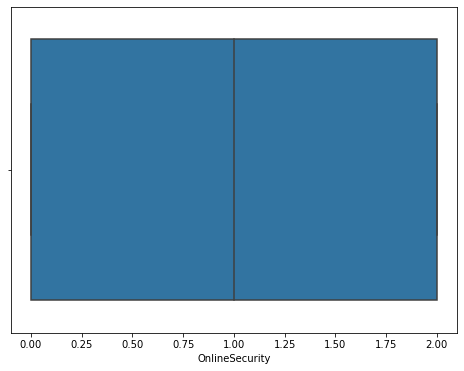

In [67]:
plt.figure(figsize=(8,6))
sns.boxplot(df['OnlineSecurity'])
plt.show()

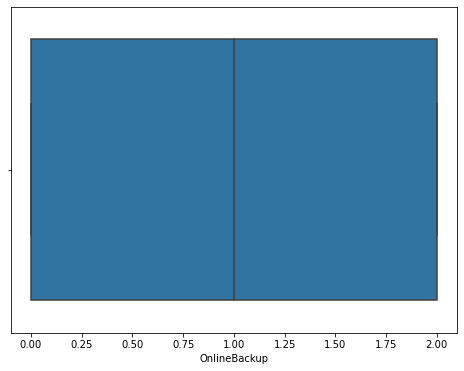

In [68]:
plt.figure(figsize=(8,6))
sns.boxplot(df['OnlineBackup'])
plt.show()

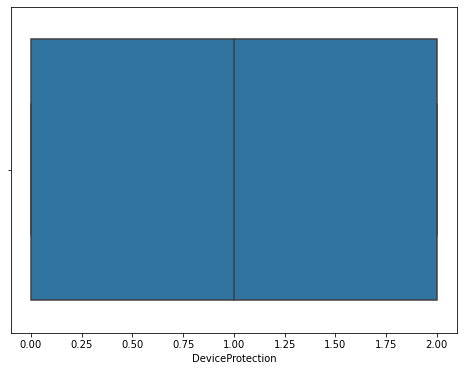

In [69]:
plt.figure(figsize=(8,6))
sns.boxplot(df['DeviceProtection'])
plt.show()

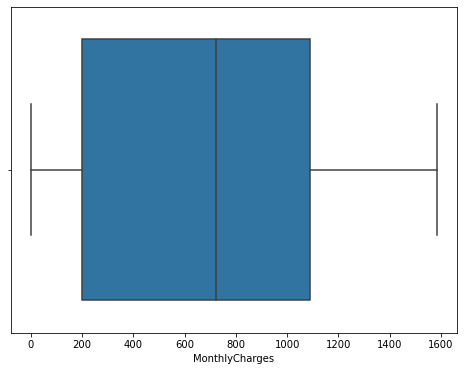

In [70]:
plt.figure(figsize=(8,6))
sns.boxplot(df['MonthlyCharges'])
plt.show()

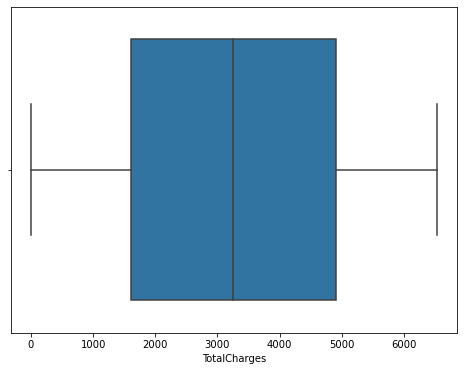

In [71]:
plt.figure(figsize=(8,6))
sns.boxplot(df['TotalCharges'])
plt.show()

# Removing Outliers:

In [72]:
from scipy.stats import zscore
z = zscore

In [74]:
df1 =  X[['SeniorCitizen','PhoneService']].copy()

In [75]:
Z = zscore(df1)

In [76]:
z_abs_score = np.abs(Z)

In [77]:
df2 = df1[(z_abs_score < 3).all(axis=1)]

In [78]:
df2.shape

(6361, 2)

In [79]:
df1.shape

(7043, 2)

In [80]:
dropindx = X.index.difference(df2.index)

In [81]:
df.drop(dropindx,inplace = True) #dropping the outlier Dataframe

In [82]:
df.shape

(6361, 20)

# Skewness:

In [95]:
df.skew()

gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.629701
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.166854
TotalCharges       -0.041683
Churn               1.053055
dtype: float64

In [96]:
X = df.drop(columns = ['Churn'])
y = df['Churn']

In [97]:
X.skew()

gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.629701
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.166854
TotalCharges       -0.041683
dtype: float64

# Plotting Skewness:

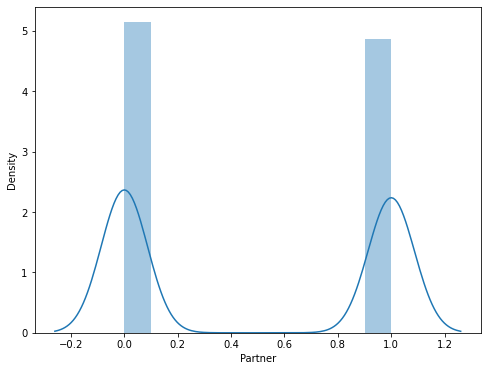

In [98]:
plt.figure(figsize=(8,6))
sns.distplot(df['Partner'])
plt.show()

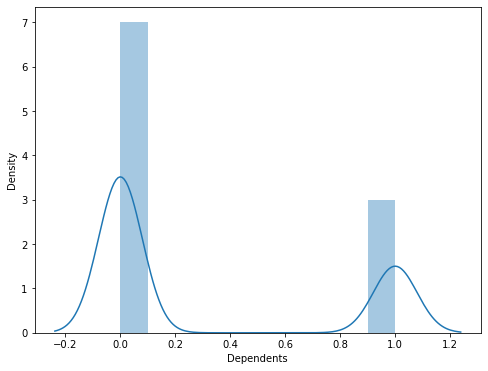

In [99]:
plt.figure(figsize=(8,6))
sns.distplot(df['Dependents'])
plt.show()

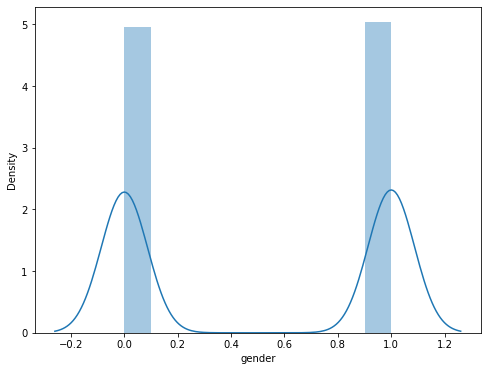

In [100]:
plt.figure(figsize=(8,6))
sns.distplot(df['gender'])
plt.show()

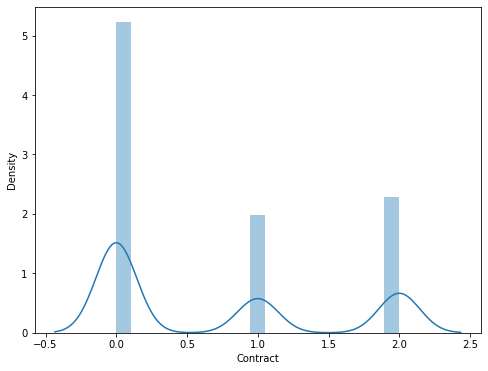

In [101]:
plt.figure(figsize=(8,6))
sns.distplot(df['Contract'])
plt.show()

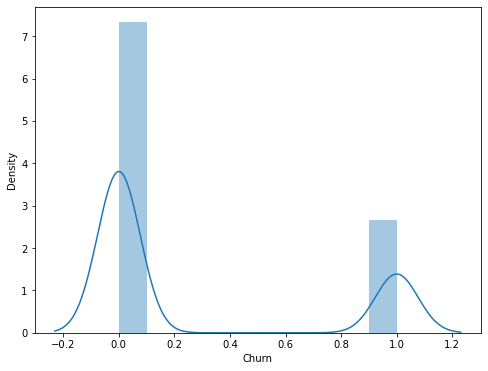

In [102]:
plt.figure(figsize=(8,6))
sns.distplot(df['Churn'])
plt.show()

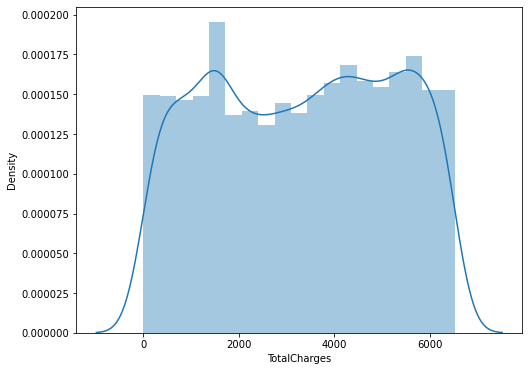

In [103]:
plt.figure(figsize=(8,6))
sns.distplot(df['TotalCharges'])
plt.show()

# Standerd Scaler Method:

In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df)

In [106]:
scaled_X

array([[ 0.99263832, -0.44159123, -0.97224479, ..., -0.47290762,
        -0.97184453, -0.60368524],
       [ 0.99263832, -0.44159123, -0.97224479, ..., -0.60149653,
        -1.66201174,  1.65649239],
       [-1.00741628, -0.44159123, -0.97224479, ...,  0.00618976,
        -1.25708552,  1.65649239],
       ...,
       [-1.00741628, -0.44159123,  1.02854755, ...,  1.27341271,
         1.25946763, -0.60368524],
       [ 0.99263832,  2.26453771,  1.02854755, ...,  0.14307473,
        -0.34231081,  1.65649239],
       [ 0.99263832, -0.44159123, -0.97224479, ...,  1.37296542,
         1.10603855, -0.60368524]])

# Principle Component Analysis:

In [107]:
from sklearn.decomposition import PCA

In [108]:
pca = PCA()

In [110]:
data_pca = pca.fit(scaled_X)

In [111]:
data_pca.explained_variance_ratio_

array([1.97298624e-01, 1.32263631e-01, 6.98408700e-02, 6.34774518e-02,
       5.54854034e-02, 5.27018066e-02, 4.65967122e-02, 4.41094572e-02,
       4.32928057e-02, 4.04583806e-02, 3.85051006e-02, 3.72932836e-02,
       3.61900765e-02, 3.47785819e-02, 2.98146176e-02, 2.78891455e-02,
       2.46445511e-02, 1.45665342e-02, 1.07929664e-02, 1.10899202e-38])

In [112]:
var_component = np.cumsum(data_pca.explained_variance_ratio_)*100
var_component

array([ 19.72986239,  32.95622551,  39.9403125 ,  46.28805768,
        51.83659802,  57.10677869,  61.76644991,  66.17739563,
        70.5066762 ,  74.55251426,  78.40302432,  82.13235269,
        85.75136033,  89.22921853,  92.21068028,  94.99959483,
        97.46404994,  98.92070336, 100.        , 100.        ])

In [113]:
#finding cumulative variance
k = np.argmax(var_component>99)
print('Number of components explaining 99% variance:',k)

Number of components explaining 99% variance: 18


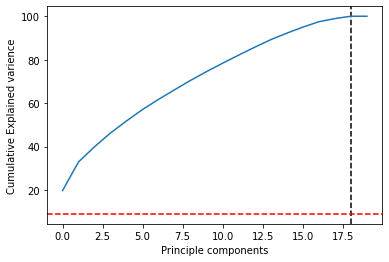

In [118]:
#ploting cumulative variance
plt.ylabel('Cumulative Explained varience')
plt.xlabel('Principle components')
plt.axvline(x=k, color='k',linestyle='--')
plt.axhline(y=9, color='r',linestyle='--')
plt.plot(var_component)
plt.show()

# Model Building:

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV,cross_val_score

# Spliting Data:

In [120]:
X = df.drop(columns = ['Churn'])
y = df['Churn']

In [129]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [130]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [131]:
lr.score(X_train,y_train)

0.7989386792452831

In [132]:
pred_lr = lr.predict(X_test)

In [133]:
print(accuracy_score(y_test,pred_lr))

0.7941869599371564


## Decision Tree Classifier:

In [134]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [135]:
dtc.score(X_train,y_train)

0.9974449685534591

In [136]:
pred_dtc = dtc.predict(X_test)

In [137]:
print(accuracy_score(y_test,pred_dtc))

0.7352710133542812


## KNeighborsClassifier:

In [139]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [141]:
knn.score(X_train,y_train)

0.8227201257861635

In [142]:
pred_knn = knn.predict(X_test)

In [144]:
print(accuracy_score(y_test,pred_knn))

0.769835035349568


## RandomForestClassifier:

In [146]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [147]:
rfc.score(X_train,y_train)

0.9974449685534591

In [148]:
pred_rf = rfc.predict(X_test)

In [149]:
print(accuracy_score(y_test,pred_rf))

0.8067556952081697


# Cross Validation:

In [150]:
#logistic regression
print(cross_val_score(lr,X,y,cv=5).mean())

0.7987727697164624


In [151]:
#Decisiontressclassifier
print(cross_val_score(dtc,X,y,cv=5).mean())

0.7303909943826054


In [153]:
#knn Classifier
print(cross_val_score(knn,X,y,cv=5).mean())

0.7494128167504088


In [155]:
#Randomforestclassifier
print(cross_val_score(rfc,X,y,cv=5).mean())

0.7927989150572856


### From Accuracy score and Cross Validation score we can conclude that RandomForestClassifier as our best fitting model.

# Hyper Parameter Tuning:

In [156]:
rf = RandomForestClassifier()

In [157]:
params = {'max_depth':[6,7,8],'max_features':['auto','sqrt'],'n_estimators':[200,300],'criterion' :['gini','entropy']}

In [158]:
hpt = GridSearchCV(rf, params, cv=5)

In [160]:
hpt.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [200, 300]})

In [162]:
hpt.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [163]:
customer_churn = RandomForestClassifier()
customer_churn.fit(X_train,y_train)
pred_rf = customer_churn.predict(X_test)
acc = accuracy_score(y_test,pred_rf)
print(acc*100)

79.73291437549096


# AUC ROC Curve:

In [164]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [165]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
pred_rf = rfc.predict(X_test)
rfc_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))

In [166]:
fpr,tpr,thersholds = roc_curve(y_test,rfc.predict_proba(X_test)[:,1])

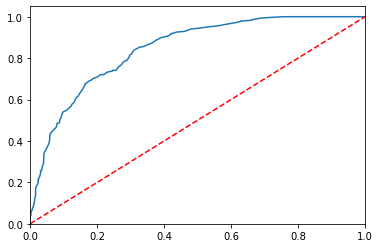

In [171]:
plt.figure()
plt.plot(fpr,tpr,label='RandomForestClassifier'%rfc_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.savefig('ROC')
plt.show()

# Saving The Model:

In [172]:
import joblib
joblib.dump(customer_churn,'Customer_Churn_Prediction.pkl')

['Customer_Churn_Prediction.pkl']

# !!!!! THANK YOU !!!!!